# Stock Market predicton of ITC stocks from 2002 to 2022

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model

D:\anac\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.layers import Dense

In [4]:
import keras.backend as k

In [5]:
from keras.callbacks import EarlyStopping

In [6]:
from tensorflow.keras.optimizers import Adam

In [7]:
from keras.models import load_model

In [8]:
from keras.layers import LSTM

In [9]:
from keras.utils.vis_utils import plot_model

### Visualising the data set

In [10]:
df=pd.read_csv('ITC.NS.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-11-29,14.355555,14.400000,14.045555,14.110000,9.110359,11307960.0
2002-12-02,14.225555,14.522222,14.155555,14.447777,9.328453,16884315.0
2002-12-03,14.566666,14.642222,14.377777,14.444444,9.326302,15716160.0
2002-12-04,14.455555,14.653333,14.266666,14.392222,9.292582,13467375.0
2002-12-05,14.400000,14.532222,14.355555,14.435555,9.320561,3596130.0
...,...,...,...,...,...,...
2022-11-22,337.000000,341.000000,335.700012,340.250000,340.250000,6495845.0
2022-11-23,342.000000,342.000000,337.500000,339.799988,339.799988,7768291.0
2022-11-24,339.799988,342.500000,337.549988,340.750000,340.750000,8140857.0


In [11]:
df.shape

(4972, 6)

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### the 'close' value will be the final output that will be forecasted using ML model

<AxesSubplot:xlabel='Date'>

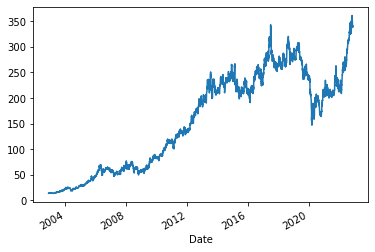

In [14]:
df['Close'].plot()

In [15]:
output_var = pd.DataFrame(df['Close'])
features = ['Open','High','Low','Volume']

In [16]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform =pd.DataFrame(columns=features,data= feature_transform,index=df.index)
feature_transform

,Open,High,Low,Volume
Date,,,,
2002-11-29,0.004168,0.002051,0.004679,0.075649
2002-12-02,0.003793,0.002403,0.005000,0.112954
2002-12-03,0.004776,0.002748,0.005650,0.105139
2002-12-04,0.004456,0.002780,0.005325,0.090095
2002-12-05,0.004296,0.002431,0.005585,0.024058
...,...,...,...,...
2022-11-22,0.933735,0.941196,0.944624,0.043456
2022-11-23,0.948140,0.944071,0.949884,0.051969
2022-11-24,0.941802,0.945509,0.950030,0.054461


In [17]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [18]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [22]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
564/564 [==============================] - 3s 3ms/step - loss: 22061.5273
Epoch 2/100
564/564 [==============================] - 2s 3ms/step - loss: 12092.4307
Epoch 3/100
564/564 [==============================] - 2s 3ms/step - loss: 4825.9121
Epoch 4/100
564/564 [==============================] - 2s 3ms/step - loss: 1583.3964
Epoch 5/100
564/564 [==============================] - 2s 3ms/step - loss: 786.6158
Epoch 6/100
564/564 [==============================] - 2s 3ms/step - loss: 511.3800
Epoch 7/100
564/564 [==============================] - 2s 3ms/step - loss: 264.9882
Epoch 8/100
564/564 [==============================] - 2s 3ms/step - loss: 102.1611
Epoch 9/100
564/564 [==============================] - 2s 3ms/step - loss: 35.4457
Epoch 10/100
564/564 [==============================] - 2s 3ms/step - loss: 16.6420
Epoch 11/100
564/564 [==============================] - 2s 3ms/step - loss: 11.6509
Epoch 12/100
564/564 [==============================] - 2s 3ms/step - l

In [27]:
y_pred = lstm.predict(X_test)

15/15 [==============================] - 1s 5ms/step


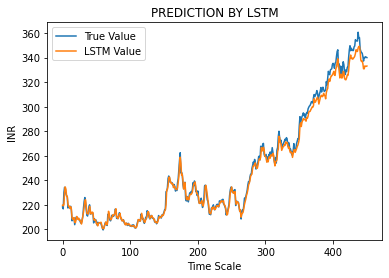

In [31]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label= 'LSTM Value')
plt.title('PREDICTION BY LSTM')
plt.xlabel("Time Scale")
plt.ylabel('INR')
plt.legend()
plt.show()

## Forecast

In [40]:
y =df['Close'].fillna(method='ffill')

In [41]:
y

Date
2002-11-29     14.110000
2002-12-02     14.447777
2002-12-03     14.444444
2002-12-04     14.392222
2002-12-05     14.435555
                 ...    
2022-11-22    340.250000
2022-11-23    339.799988
2022-11-24    340.750000
2022-11-25    340.299988
2022-11-28    340.049988
Name: Close, Length: 4961, dtype: float64

In [42]:
y = y.values.reshape(-1,1)

In [43]:
y

array([[ 14.11    ],
       [ 14.447777],
       [ 14.444444],
       ...,
       [340.75    ],
       [340.299988],
       [340.049988]])

In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler=scaler.fit(y)
y=scaler.transform(y)

In [48]:
n_lookback =60
n_forecast =30

In [49]:
X =[]
Y =[]

In [50]:
for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

In [51]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

In [54]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [56]:
model.fit(X, Y, epochs=10, batch_size=32, verbose=0)

In [57]:
X_ = y[- n_lookback:]  
X_ = X_.reshape(1, n_lookback, 1)

In [58]:
Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 2s 2s/step


In [59]:
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

D:\anac\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [69]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

In [70]:
results = df_past.append(df_future).set_index('Date')

<AxesSubplot:title={'center':'ITC'}, xlabel='Date'>

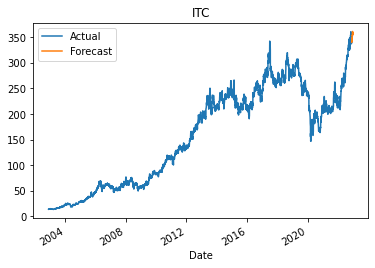

In [71]:
results.plot(title='ITC')